# Classification

A very important point that we must pay attention to is that this exercise has two separate datasets, so we must perform the evaluation and training tasks on the first dataset and consider the test dataset only as unseen data.

For creating an AI model,we should follow these phases:
* Preparing the data
* Preprocessing the data
* Learning the model & Evaluating the results
* Predictting real values

# Set up enviroment

In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder, FunctionTransformer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

import joblib

# for visuallization
import plotly.express as px

# Preparing the data

In [26]:
from google.colab import files
uploaded = files.upload()

Saving heart_test.csv to heart_test (3).csv


In [27]:
from google.colab import files
uploaded2 = files.upload()

Saving heart_train.csv to heart_train (1).csv


In [ ]:
uploaded["heart_test (3).csv"]

In [ ]:
uploaded2["heart_train (1).csv"]

In [35]:
from io import StringIO

# Obtener el nombre del archivo cargado
filename = list(uploaded.keys())[0]

# Leer los datos del archivo usando StringIO
data = StringIO(uploaded["heart_train.csv"].decode('utf-8'))

# Crear un DataFrame con los datos
train = pd.read_csv(data)

# Mostrar los primeros registros del DataFrame
print(train.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [39]:
from io import StringIO

# Obtener el nombre del archivo cargado
filename = list(uploaded.keys())[0]

# Leer los datos del archivo usando StringIO
data2 = StringIO(uploaded["heart_test"].decode('utf-8'))

# Crear un DataFrame con los datos
test = train

# Mostrar los primeros registros del DataFrame
print(test.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [22]:
dict(train.iloc[0,:])

{'age': 63.0,
 'sex': 1.0,
 'cp': 3.0,
 'trtbps': 145.0,
 'chol': 233.0,
 'fbs': 1.0,
 'restecg': 0.0,
 'thalachh': 150.0,
 'exng': 0.0,
 'oldpeak': 2.3,
 'slp': 0.0,
 'caa': 0.0,
 'thall': 1.0,
 'output': 1.0}

## Data exploration

**Age:** Age of the patient

**Sex:** Sex of the patient

**cp:** Chest Pain type chest pain type:

- *Value 1:* typical angina
- *Value 2:* atypical angina
- *Value 3:* non-anginal pain
- *Value 4:* asymptomatic

**trtbps:** resting blood pressure (in mm Hg)

**chol:** cholestoral in mg/dl fetched via BMI sensor

**fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**restecg:** resting electrocardiographic results:

- *Value 0:* normal
- *Value 1:* having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- *Value 2:* showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalachh:** maximum heart rate achieved

**exng:** exercise induced angina (1 = yes; 0 = no)

**oldpeak:** Previous peak

**slp:** Slope

**caa:** number of major vessels

**thall:** Thalium Stress Test result ~ (0,3)

**target:**
- *0:* Less chance of heart attack
- *1:* More chance of heart attack

## 1: Data Information

In [40]:
print('trian_shape:',train.shape)
print('test_shape',test.shape)

trian_shape: (303, 14)
test_shape (303, 14)


In [41]:
train.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [44]:
train.describe(include='all')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [45]:
test.describe(include='all')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [46]:
[x for x in test.columns if x not in train.columns]

[]

## 2: Feature Charactristics

I devide the features into the numerical and categorical

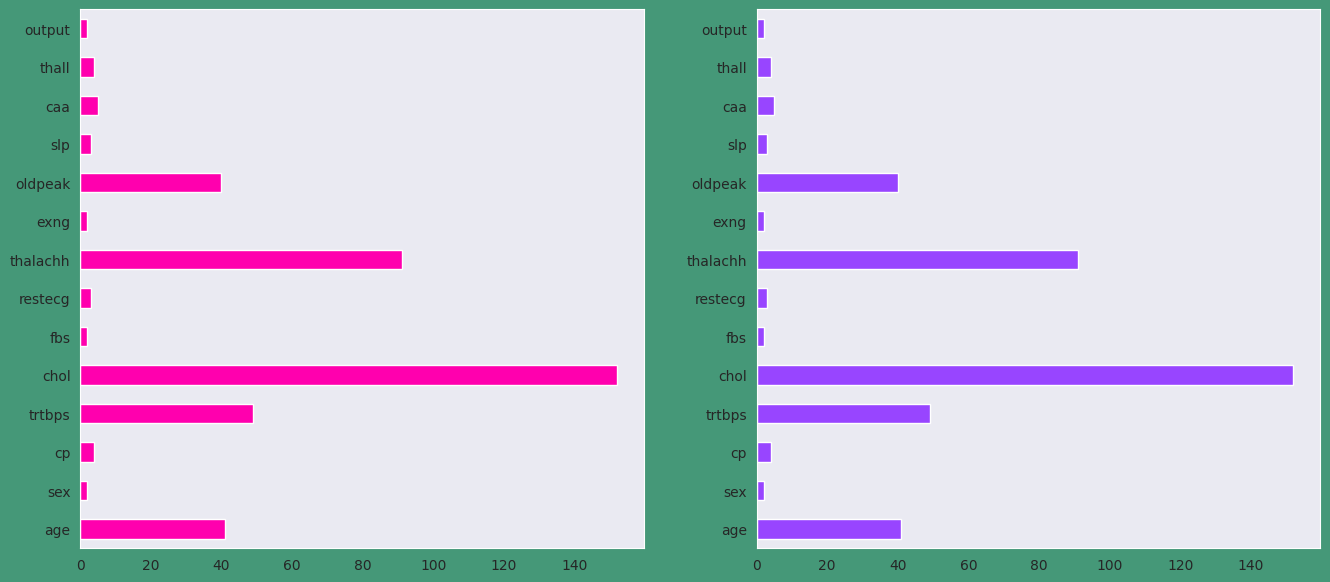

In [47]:
sns.set_style('darkgrid')
color = 'royalblue'

fig, ax = plt.subplots(1, 2, figsize=(16,7),dpi=100,facecolor='#459878')
train.nunique().plot(kind='barh',color='#ff00ae',ax=ax[0],label='train')
ax[0].grid()
test.nunique().plot(kind='barh',color='#9845ff',ax=ax[1],label='test')
ax[1].grid()

## General correlation

In [48]:
continuous_vars = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
descrete_vars = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

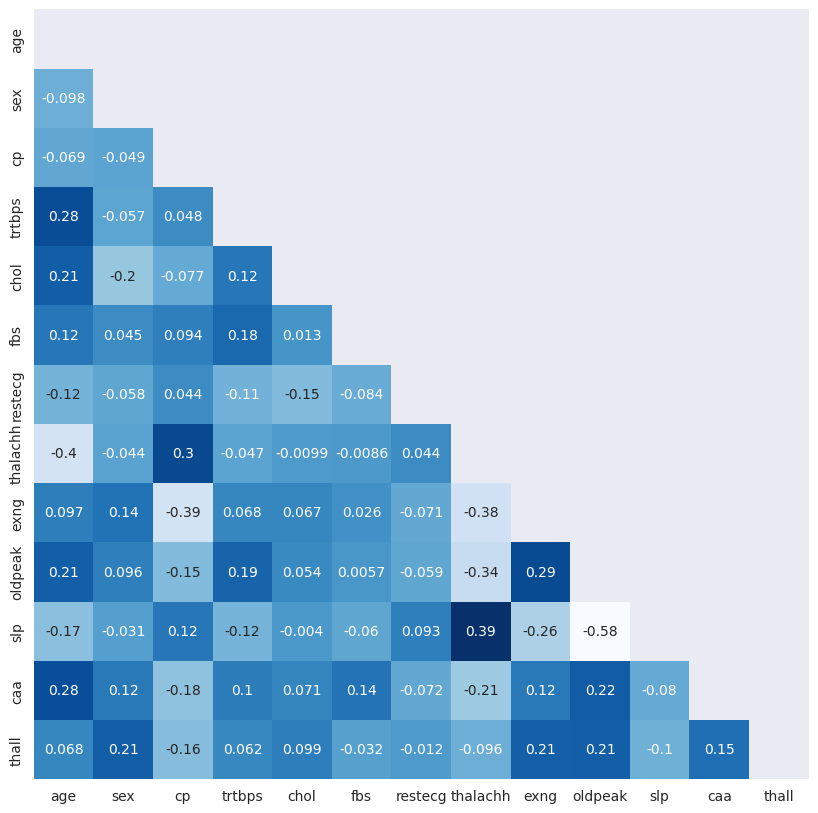

In [49]:
correlations = train.drop("output", axis = 1).corr(method = 'pearson')

plt.figure(figsize = (10, 10))
sns.heatmap(data = correlations, annot = True,
            cmap = 'Blues', cbar  = False,
            mask = np.triu(correlations))

plt.grid(False);

### Notes
There are noteworthy correlations worth exploring between certain pairs of variables in the dataset:

1. "oldpeak" and "slp": Investigating the correlation between these two variables could provide valuable insights.

2. "cp" and "exng": There seems to be a correlation between these two variables that deserves further examination.

3. "thalachh" and "age": The relationship between these two variables could be significant and worth exploring.

4. "thalachh" and "slp": There might be an interesting correlation between these two variables that warrants investigation.

By exploring these correlations, we can gain a better understanding of the relationships within the data and potentially uncover patterns that may be useful for our analysis or machine learning tasks.

Target

    0: Less chance of heart attack
    1: More chance of heart attack


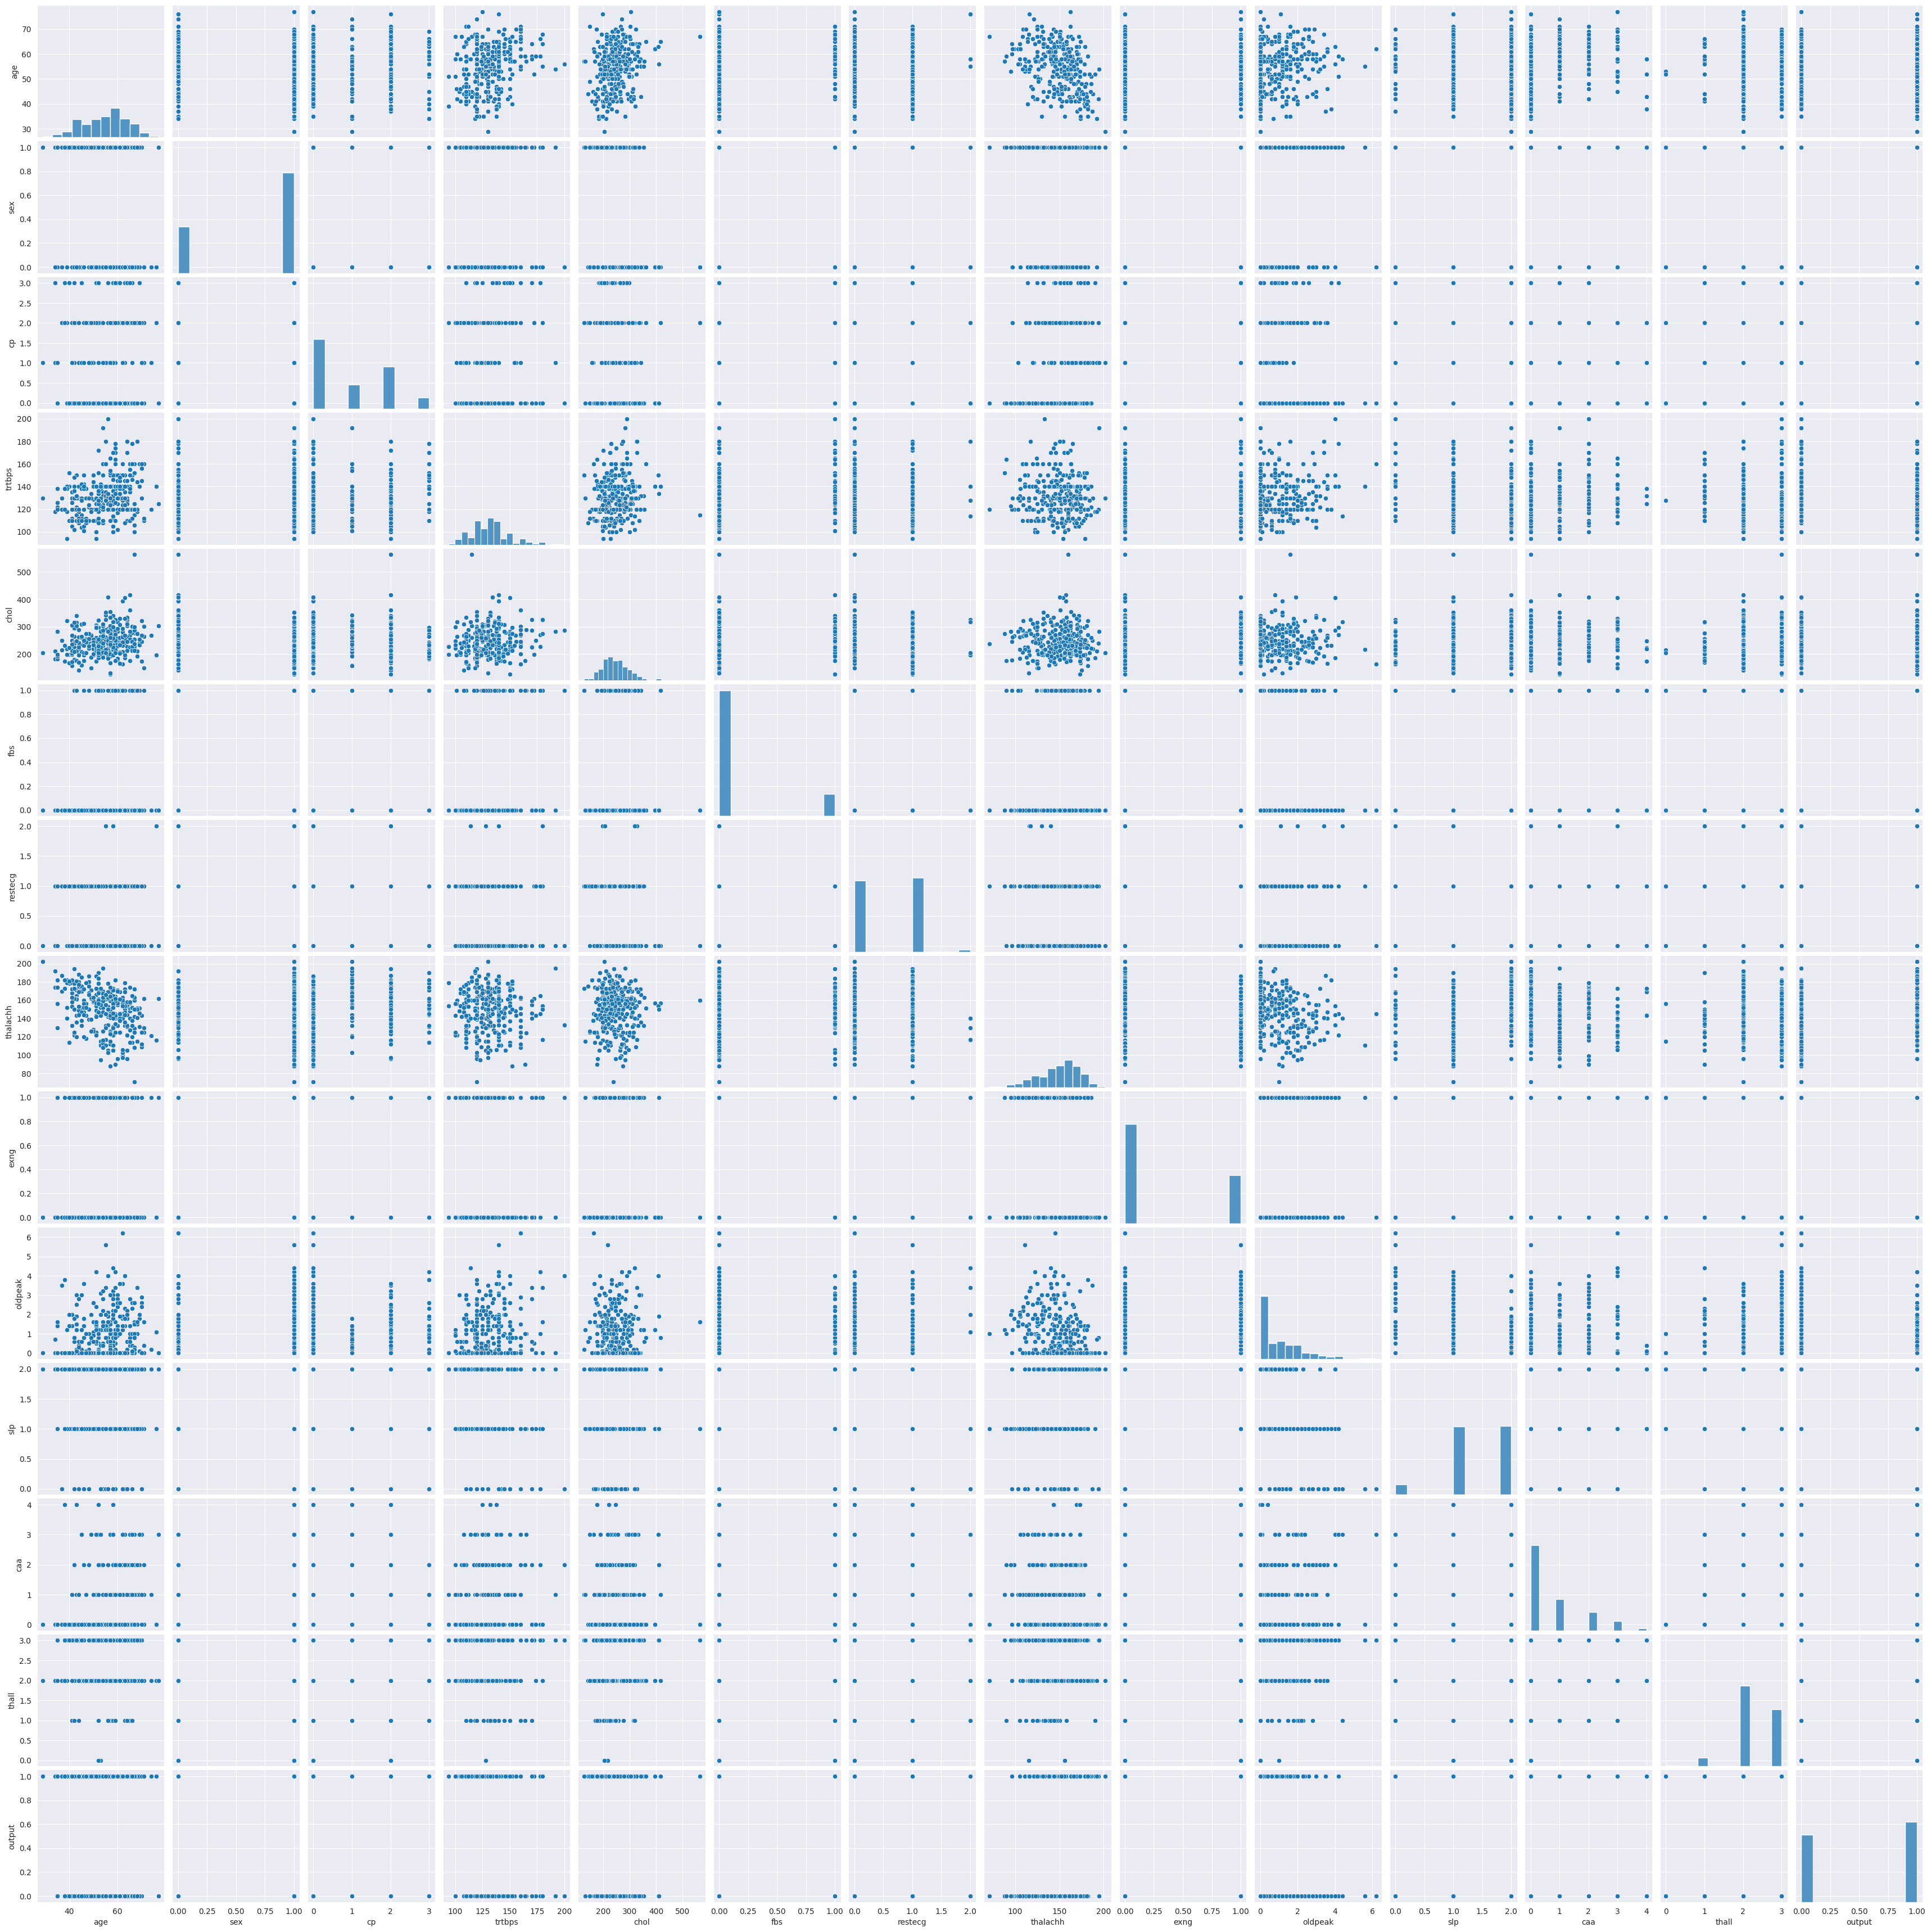

In [56]:
sns.pairplot(train)

Correlations

In [57]:
HighCorrelation =  ["exng", "oldpeak", "caa", "thall", "cp", "slp", "thalachh"]

In [62]:
import matplotlib.pyplot as plt

def plot_correlations(feature, train = train, correlated = "output", descrete_vars = descrete_vars):

    fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (10, 3))

    if feature in descrete_vars:

        sns.countplot(train = train, x = feature, hue = "output", palette = "ocean", ax = ax1)
        ax1.set_title(f"{feature} count by output")
        ax1.set_ylabel(f"{feature}")
        sns.violinplot(train = train, y = feature, x = "output", palette = "ocean", split = True, ax = ax2)
        ax2.set_title(f"{feature} chances by output")
        sns.barplot(train = train, x = feature, y = "output", palette = "ocean", ax = ax3)
        ax3.set_title(f"Output mean by {feature}")
        ax1.grid(False)
        ax2.grid(False)
        ax3.grid(False)
        plt.plot();

    else:

        sns.distplot(train[train["output"] == 0][feature], kde = False, hist_kws = {'alpha':0.8}, ax = ax1, color = "#0b0b4a")
        sns.distplot(train[train["output"] == 1][feature], kde = False, hist_kws = {'alpha':0.8}, ax = ax1, color = "#157595")
        ax1.set_ylabel(f"{feature}")
        ax1.set_title(f"{feature} distribution by output")
        sns.boxplot(train = train, y = feature, x = 'output', ax = ax2, palette = 'ocean')
        ax2.set_title(f"{feature} boxplot by output")
        sns.swarmplot(train = train, x = feature, hue = 'output', palette = 'ocean',
              edgecolor = 'k', linewidth = 0.2, ax = ax3)
        ax3.set_title(f"{feature} distribution by output")
        ax1.grid(False)
        ax2.grid(False)
        ax3.grid(False)
        plt.plot();

    plt.tight_layout()

# B: Preprocessing the data

At this stage, we must check the data from all aspects to decide if there are noise data or outliers in the columns.

## 1: Missing values & Duplicates

In [65]:
train.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [66]:
test.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

We dont have nay *NaN*s  in both datasets

In [67]:
train.drop_duplicates(inplace=True)
train.shape

(302, 14)

In [68]:
test.drop_duplicates(inplace=True)
test.shape

(302, 14)

We dont have nay *Duplicates*s in both datasets

## 2: Noise & Outliers

Noies Detection:

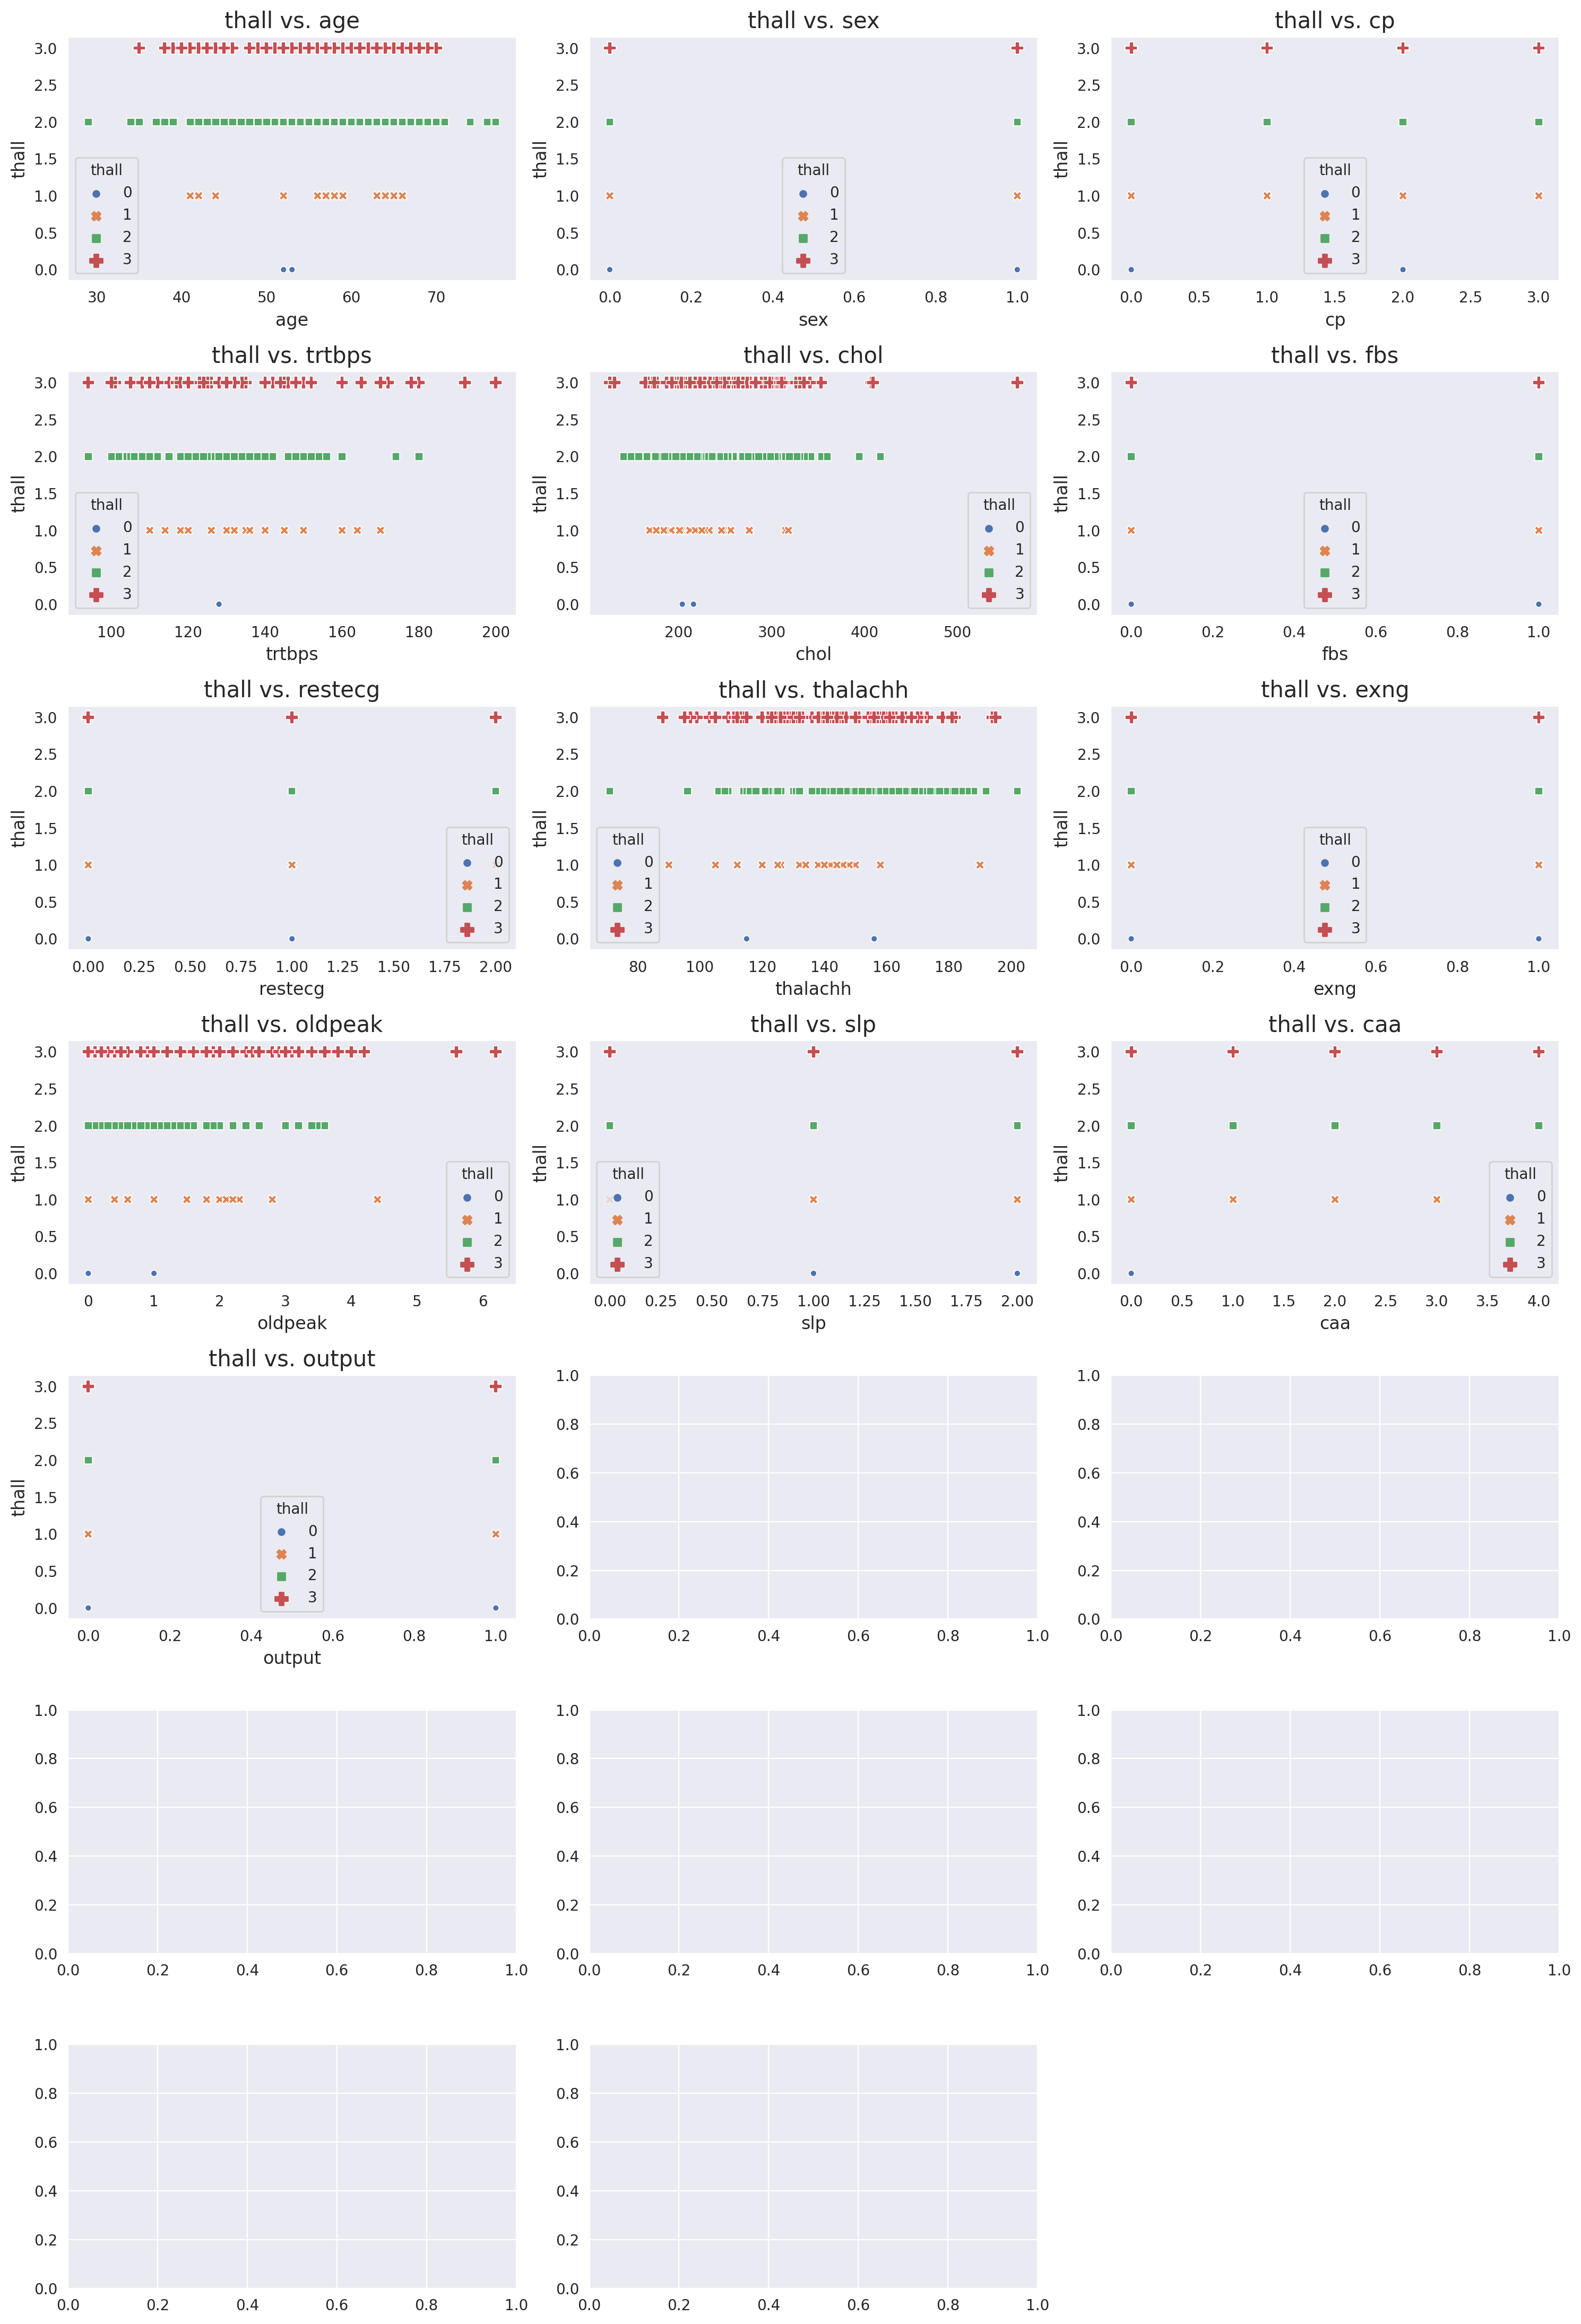

In [70]:
target = 'thall'
features = train.columns.drop(target)
colors = ['#a9f943', '#ed67cd', '#23bf00','#5687da']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=7 ,ncols=3, figsize=(15,22), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=train, x=features[i], y=target,hue=target, ax=ax[x,y],style=target,palette="deep",size=target)
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[6, 2].axis('off')

plt.tight_layout()
plt.show()

Features Description:

### Notes

- A lower "thall" value is linked to better chances of not having a heart attack. Specifically, individuals with a "thall" value of 2 have a higher likelihood of avoiding a heart attack compared to those with a "thall" value of 3. It is essential to recognize that this discrepancy might be influenced by the presence of limited data points in certain "thall" categories.

- The risk of experiencing a heart attack increases with higher values of "cp" (chest pain type). Therefore, when identifying individuals with lower chances of a heart attack, it is advisable to focus on those with a "cp" value less than 1.

- As previously explored, individuals with an "slp" value of 2 exhibit the highest chances of having a heart attack, even though there might not be a clear increasing pattern in the data.

- A higher "thalachh" value (maximum heart rate achieved during exercise) is associated with an increased probability of having a heart attack. Therefore, individuals with higher "thalachh" values are at a greater risk compared to those with lower values.

Untill here, we found that the minimum value for *px_heigth* is 320 and  for *px_width* is 240. But I found one webpage that introduce some of the small mobile that the smallest value for *px_height* is 217 and for *px_width* is 220

This site: https://ineedlearn.wordpress.com/2020/12/26/width-height-and-dpr-of-cell-phones

In [72]:
#1-
print('train******************************')
print('trtbps: ',len(train[(train['trtbps']<217)]))
print('chol: ',len(train[(train['chol']<220)]))
print('test******************************')
print('trtbps: ',len(test[(test['trtbps']<217)]))
print('chol: ',len(test[(test['chol']<220)]))



train******************************
trtbps:  302
chol:  95
test******************************
trtbps:  302
chol:  95


We wanna replace *px_height* with the minimum value (217). For the moment this code will be commented because this change will be introduced at pipelines transformation flow.

In [ ]:
# train['px_height'].replace(train['px_height'][(train['px_height']<217)].values,217,inplace=True)
# test['px_height'].replace(test['px_height'][(test['px_height']<217)].values,217,inplace=True)

2-sc-h and sc-w

the smallest phone in the world has 2.2inch diagonal(5.588 cm) so if we get *train['sc_h'].min()*, we will have minumum value for
sc_w is about 2.5 cm and if we dont consider this value for *sc_h* is not the smallest value in the world , so we can consider 2.5
for sc_w as minumum

In [ ]:
print('train******************************')
print('px_height: ',len(train[(train['sc_w']<2.5)]))
print('px_width: ',len(train[(train['sc_h']<5)]))
print('test******************************')
print('px_height: ',len(test[(test['sc_w']<2.5)]))
print('px_width: ',len(test[(test['sc_h']<5)]))

train******************************
px_height:  546
px_width:  0
test******************************
px_height:  318
px_width:  0


## 3: Correlation

Text(0.5, 1.0, 'Triangle')

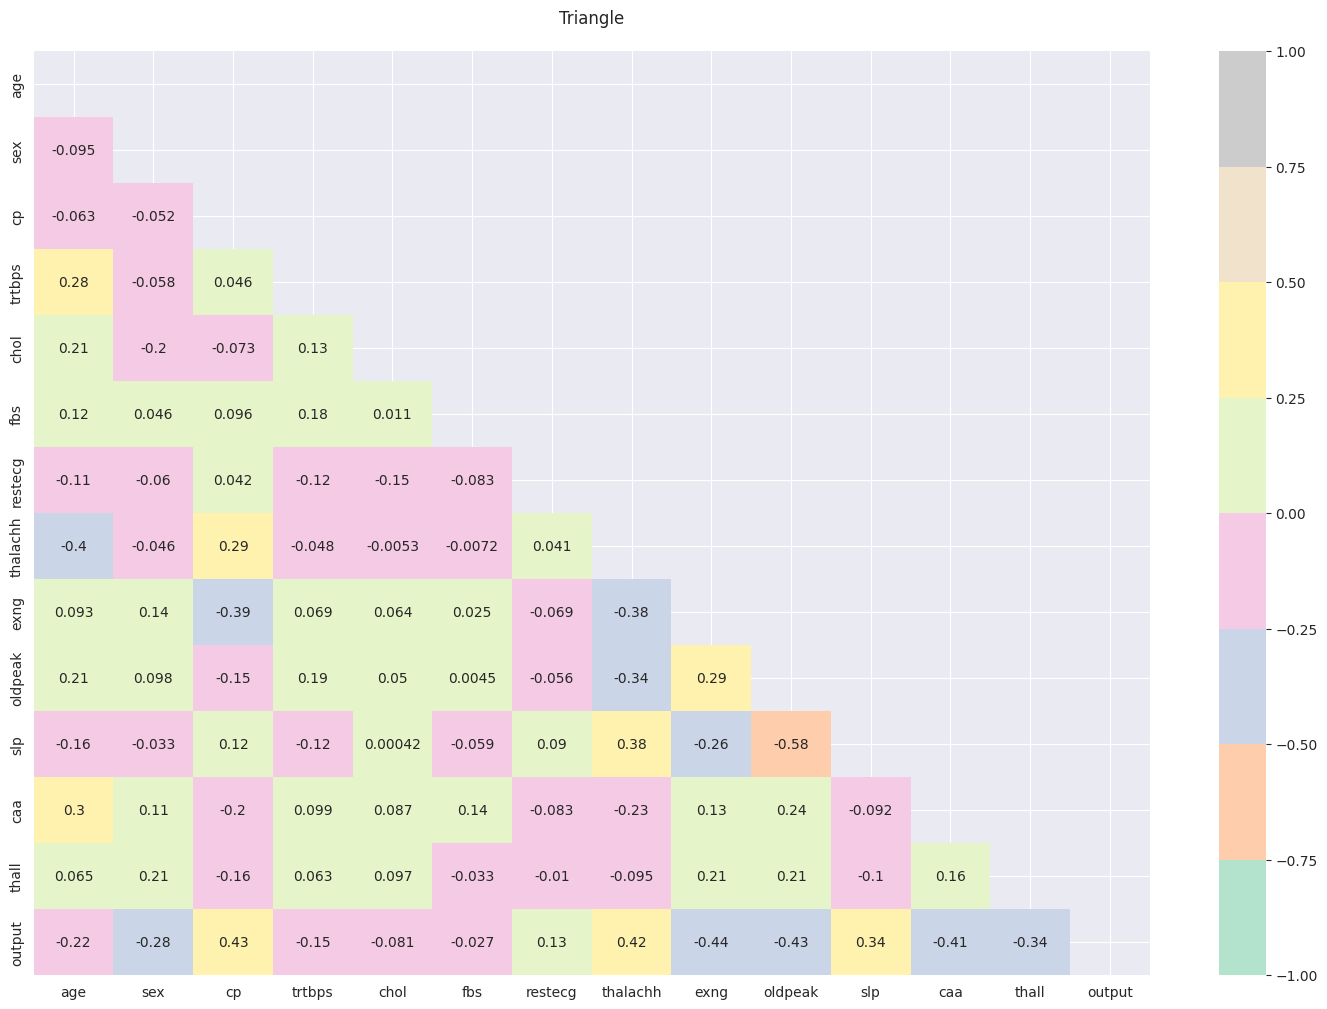

In [74]:
fig,ax=plt.subplots(1,1,figsize=(18,12))
mask=np.triu(np.ones_like(train.corr()))
heatmap=sns.heatmap(train.corr(),vmin=-1,vmax=1,mask=mask,cmap='Pastel2',annot=True)
heatmap.set_title('Triangle',fontdict={'fontsize':12},pad=20)

# C: Building pipelines for custom tranformations, cross-validation and training

## Custom Transformers

In [76]:

class CFixedValues(BaseEstimator, TransformerMixin):
    def __init__(self):

        return None

    def fit(self, X, y=None):

        return self

    def transform(self, X):
        X_copy = pd.DataFrame(X).copy()
        for col in X_copy.columns:
            if col == 'px_height':
                X_copy[col] = np.where(X_copy[col] < 217, 217, X_copy[col])
            elif col == 'sc_w':
                X_copy[col] = np.where(X_copy[col] < 2.5, 2.5, X_copy[col])
        return X_copy

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    def get_feature_names_out(self, input_features=None):
        return input_features

# Example usage
data = {'oldpeak': [5, 10, 1.5, 2.0, 2.5, 3, 3.5, 4.0],
        'chol': [100, 150, 200, 250, 300, 350, 400, 500]}
df = pd.DataFrame(data)

cfix_transformer = CFixedValues()
cfix_transformer.fit(df)
transformed_df = cfix_transformer.transform(df)

print(transformed_df)

   oldpeak  chol
0      5.0   100
1     10.0   150
2      1.5   200
3      2.0   250
4      2.5   300
5      3.0   350
6      3.5   400
7      4.0   500


In [75]:
class OutlierFixTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):

        return None

    def fit(self, X, y=None):

        if isinstance(X, pd.DataFrame):
            self.perlow = X.quantile(0.03)
            self.perupp = X.quantile(0.97)
        elif isinstance(X, np.ndarray):
            self.perlow = pd.DataFrame(X).quantile(0.03)
            self.perupp = pd.DataFrame(X).quantile(0.97)
        else:
            raise ValueError("Input X must be a pandas DataFrame or a numpy array.")
        return self

    def transform(self, X):
        X_copy = pd.DataFrame(X).copy()
        for col in X_copy.columns:
            X_copy[col] = X_copy[col].clip(lower=self.perlow[col], upper=self.perupp[col])
        return X_copy

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    def get_feature_names_out(self, input_features=None):
        return input_features



class CFixedValues(BaseEstimator, TransformerMixin):
    def __init__(self):

        return None

    def fit(self, X, y=None):

        return self

    def transform(self, X):
        X_copy = pd.DataFrame(X).copy()
        for col in X_copy.columns:
            if col == 'px_height':
                X_copy[col] = np.where(X_copy[col] < 217, 217, X_copy[col])
            elif col == 'sc_w':
                X_copy[col] = np.where(X_copy[col] < 2.5, 2.5, X_copy[col])
        return X_copy

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    def get_feature_names_out(self, input_features=None):
        return input_features



In [ ]:
perlow

col1      7.1
col2    121.0
Name: 0.03, dtype: float64

In [77]:
2.5 <= transformed_df['oldpeak'].min()

False

## Building the pipeline

In [78]:
numtr = Pipeline(steps=[
    ('imput_mode', SimpleImputer(strategy='most_frequent')),
    ('outliers', OutlierFixTransformer()),
    ('scaler', StandardScaler())])

sp_num = Pipeline(steps=[
    ('imput_mode', SimpleImputer(strategy='most_frequent')),
    ('outliers', CFixedValues()),
    ('scaler', StandardScaler())])

cattr = Pipeline(steps=[('imput_zero', SimpleImputer(strategy='most_frequent')),
                        ('onehot', OneHotEncoder(dtype='int', handle_unknown='error'))])

In [ ]:
coltr = ColumnTransformer(transformers =
            [('numtr', numtr, [x for x in num_columns if x not in ['px_height', 'sc_w']]),
             ('sp_num', sp_num, ['px_height', 'sc_w']),
             ('cat', cattr, ['n_cores'])],
            remainder='passthrough')

# D: Choose the best model & Evaluating the results

At this stage, we have to build several types of models that are suitable for this dataset and finally evaluate them.

* __In this section, we go to the expression of models. In this project, we are going to officially use 3 decision tree models **DT**, random forest **RF** and **SVM**.
* __I present the construction of these models in 3 parts.
* __In the first part, we present only 3 models without any hyperparameters and express the results through cross-validation iterations.
* __In the second part, we define a separate function for the best model  and express the results. Of course, in this section, we will set a series of important hyperparameters and see the results.



In [80]:
def evaluate_model(model, X, y, metric='accuracy'):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

    scoring = {'accuracy' : make_scorer(accuracy_score),
       'precision' : make_scorer(precision_score, average = 'weighted'),
       'recall' : make_scorer(recall_score, average = 'weighted'),
       'f1_score' : make_scorer(f1_score, average = 'weighted')}

    scores = cross_val_score(model, X, y,
                             scoring=scoring[metric], cv=cv, n_jobs=-1)
    return scores

def get_models():
    models = dict()

    models['Decision Tree'] = DecisionTreeClassifier(random_state=42)

    models['SVC'] = SVC(random_state=42, probability=True)

    models['Random Forest'] = RandomForestClassifier(random_state=42)
    return models


def highlight(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

## 1: Cross Validation

In [81]:
Y=train['trtbps']
X=train.drop('trtbps',axis=1)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [83]:
models = get_models()
models

{'SVC': SVC(probability=True, random_state=42),
 'Decision Tree': DecisionTreeClassifier(random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42)}

In [ ]:
dfp = pd.pivot_table(ragg, index='Model', columns='metric', values='avg').reset_index()
dfp.columns = ['Model',	'Acurracy',	'F1_score',	'Precision', 'Recall']
dfp['Tipo'] = 'Valid'
dfp = pd.concat([dfp, mmetrics.assign(Tipo='Test')])
dfp = dfp.sort_values(['Model', 'Tipo'], ascending=False)
dfp = dfp[['Model', 'Tipo',	'Acurracy',	'F1_score',	'Precision', 'Recall']]
dfp = pd.melt(dfp, id_vars=['Model', 'Tipo'])
dfp = pd.pivot_table(dfp, index=['Tipo', 'variable'], values='value', columns='Model')
dfp = dfp.style.apply(highlight,axis=1)
dfp

According to the results obtained from the above modeling, the SVM model has obtained the best result. Therefore, we choose this model as our main model for the next step, which is to predict the actual values. But we must pay attention to the fact that we may achieve better results by adjusting hyperparameters in other models, which makes us choose it as our main model. So, the SVM model has been selected so far.

# Saving model pipe

In [ ]:
joblib.dump(mpipe, "svm_class_mobilepc.pkl")

['svm_class_mobilepc.pkl']

Testing model after loading it:

In [ ]:
model = joblib.load("svm_class_mobilepc.pkl")

In [ ]:
model.predict(test.iloc[[150]])

array([2], dtype=int64)